<a href="https://colab.research.google.com/github/022000672-Luc/upsrj-machine-learning/blob/main/LinearRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Practica: Linear Regression Pipeline

Para esta práctica se creó un archivo CSV con 100 registros, el cual contiene:

Variable independiente: hours_studied

Variable dependiente: final_score

Los datos fueron generados de forma artificial utilizando herramientas de IA, simulando una relación lineal realista con un pequeño nivel de ruido para representar variaciones naturales en los resultados.

Este archivo es utilizado como entrada para el entrenamiento del modelo de machine learning.

Importación de librerías

In [1]:
#IMPOR LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


En esta celda se importan las librerías necesarias para el desarrollo de la práctica.

NumPy (np): se utiliza para generar datos numéricos aleatorios y realizar operaciones matemáticas.

Pandas (pd): permite manejar los datos en forma de tablas (DataFrame) y crear el archivo CSV.

Matplotlib (plt): se usa para graficar los datos y visualizar la regresión lineal.

##Generación del conjunto de datos y archivo CSV

In [2]:
np.random.seed(42)

# Variable independiente: horas de estudio (0 a 10 horas)
hours_studied = np.random.uniform(0, 10, 100)

# Variable dependiente: calificación final (relación lineal + ruido)
final_score = 5 * hours_studied + np.random.normal(0, 3, 100)

# Crear DataFrame
data = pd.DataFrame({
    'hours_studied': hours_studied,
    'final_score': final_score
})

# Guardar CSV
data.to_csv('study_vs_score.csv', index=False)

data.head()


,hours_studied,final_score
0,3.745401,18.988147
1,9.507143,46.638693
2,7.319939,36.874979
3,5.986585,23.970217
4,1.560186,7.141916


##Carga del archivo CSV y separación de variables

In [3]:
# Cargar CSV
df = pd.read_csv('study_vs_score.csv')

X = df[['hours_studied']]
y = df['final_score']


##Creación del Pipeline

In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])


##División de datos y entrenamiento del modelo
En esta celda los datos se dividen en:

80% para entrenamiento

20% para prueba

Esto permite evaluar el modelo con datos que no ha visto antes.

Posteriormente, el pipeline se entrena usando los datos de entrenamiento, aplicando automáticamente el escalado y la regresión lineal.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

##Visualización de resultados con Matplotlib

In [7]:
y_pred = pipeline.predict(X_test)


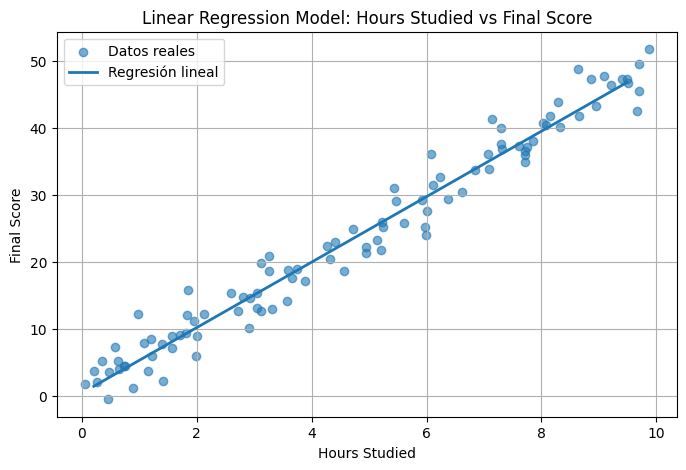

In [9]:
# Ordenar los valores para una línea continua
sorted_idx = X_test['hours_studied'].argsort()
X_sorted = X_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, label='Datos reales')
plt.plot(X_sorted, y_pred_sorted, linewidth=2, label='Regresión lineal')

plt.xlabel('Hours Studied')
plt.ylabel('Final Score')
plt.title('Linear Regression Model: Hours Studied vs Final Score')
plt.legend()
plt.grid(True)
plt.show()
